# Convolution Neural Network (CNN)

We will visualize activation of each convolutional network layer in a 2D grid. The intuition behind this is simple: once you have trained a neural network, and it performs well on the task, you as the data scientist want to understand what exactly the network is doing when given any specific input. Or, in the case of visual tasks, what the network is seeing in each image allows it to perform the task so well. This technique can be used to determine what kinds of features a convolutional network learns at each layer of the network.

### <font color = green>Deep Layer Visualization</blue>

In [1]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

Next we import the MNIST data files we are going to be classifying. This database contains images of thousands of handwritten digits, and their proper labels. 

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Next we define our convolutional network. It will be a network with three sets of convolution -> pooling layers, followed by a fully connected softmax layer. I have choosen 5,5,20 to begin with. Feel free to adjust the number of convolutional filters at each layer. It is these filters we will be visualizing, so we can see in realtime what features are learned from the dataset with more or less filters.

In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

We then train the network using batch gradient descent with Adam optimization. Feel free to adjust the batch size and number of iterations to see how it effects the model accuracy.

In [4]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.26
step 200, training accuracy 0.6
step 300, training accuracy 0.78
step 400, training accuracy 0.94
step 500, training accuracy 0.96
step 600, training accuracy 0.8
step 700, training accuracy 0.9
step 800, training accuracy 0.88
step 900, training accuracy 0.92
step 1000, training accuracy 0.94


In [5]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

test accuracy 0.9133


Now we define a couple functions that will allow us to visualize the network. The first gets the activations at a given layer for a given input image. The second plots those activations in a grid.

In [6]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)
    
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

Now we can choose an image to pass through the network to visualize the network activation, and look at the raw pixels of that image.

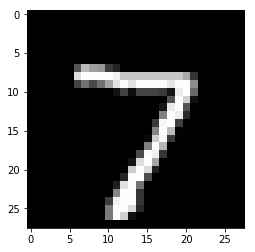

In [7]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

Now we can look at how that image activates the neurons of the first convolutional layer. Notice how each filter has learned to activate optimally for different features of the image.

First layer:

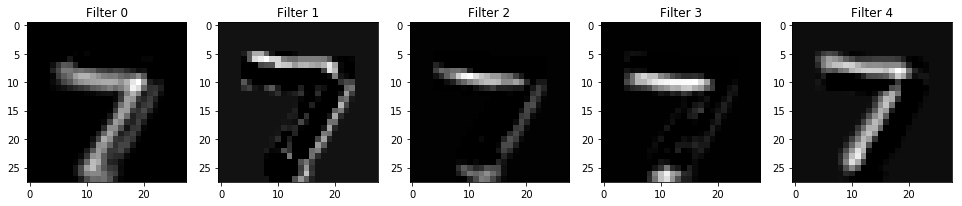

In [8]:
getActivations(hidden_1,imageToUse)

Second layer:

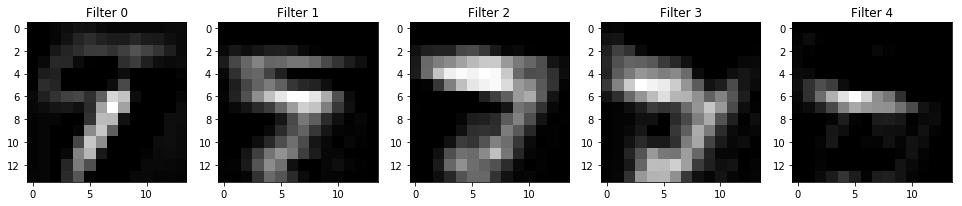

In [9]:
getActivations(hidden_2,imageToUse)

Third layer:

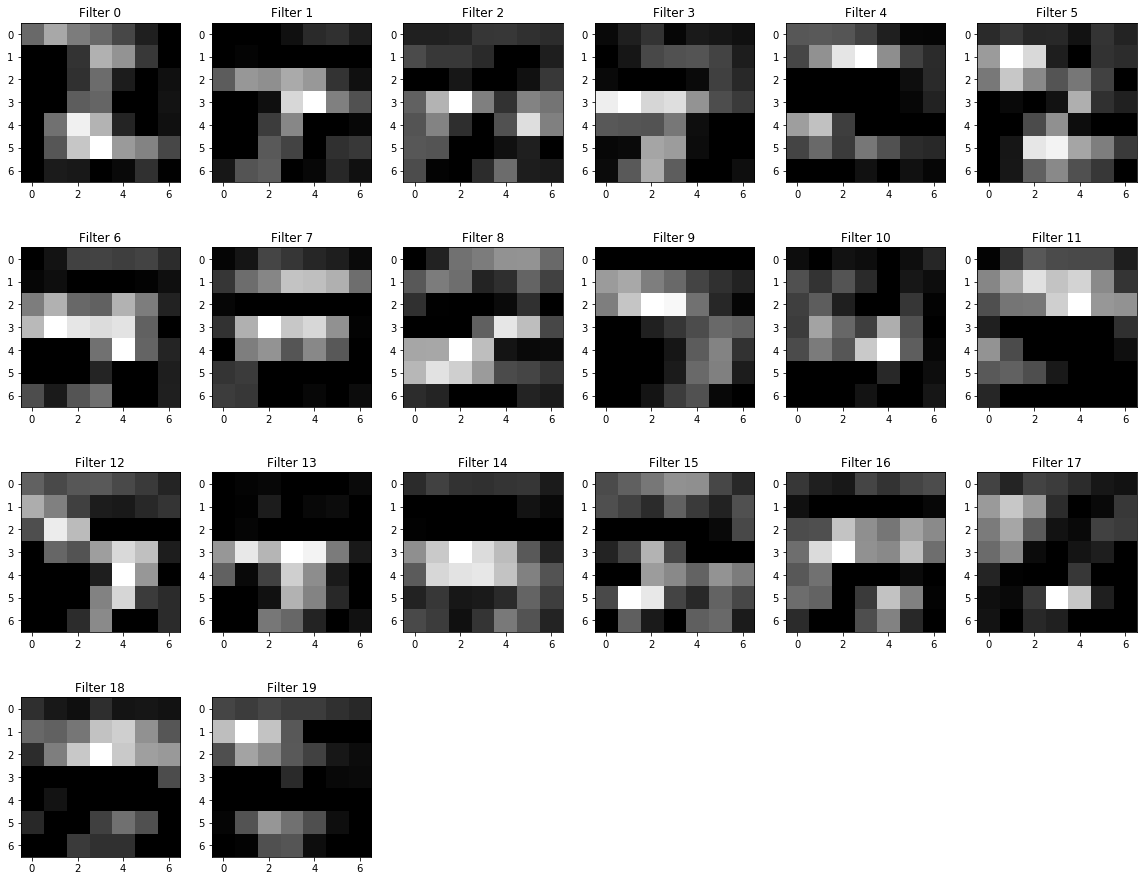

In [10]:
getActivations(hidden_3,imageToUse)

---